# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [2680]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2681]:
# url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
# df = pd.read_csv(url)

df = pd.read_csv('/Users/fepriyadi/Downloads/bank_transactions_data_edited.csv')

In [2682]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [2683]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [2684]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

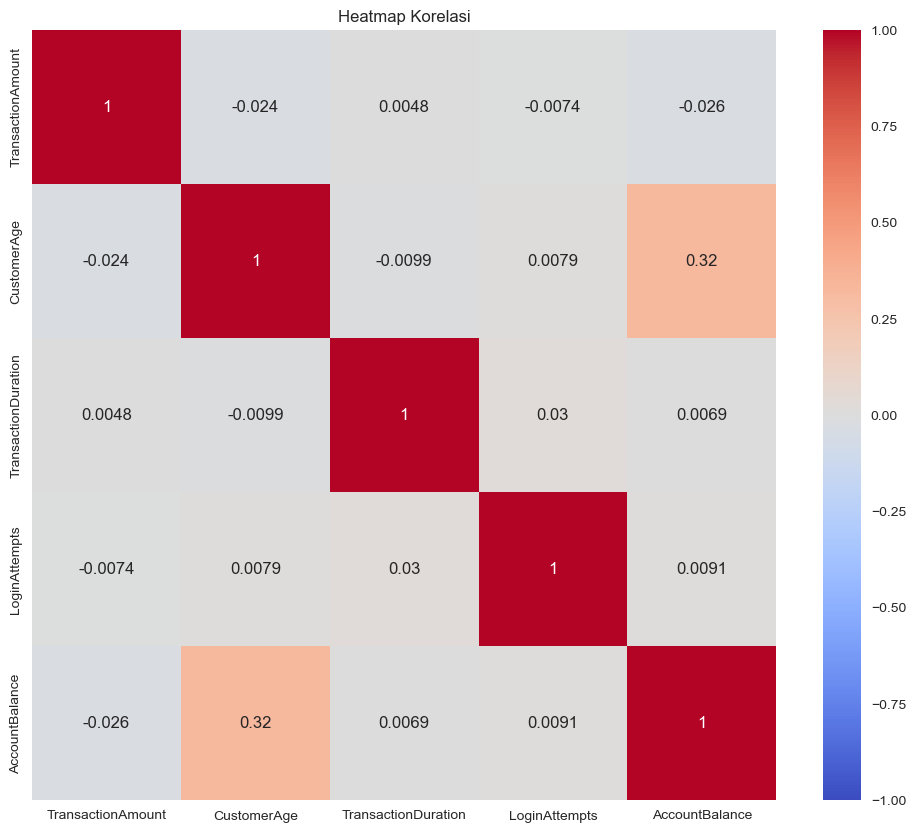

In [2685]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_features = df.select_dtypes(include=['number'])
correlation_matrix = num_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi')
plt.show()


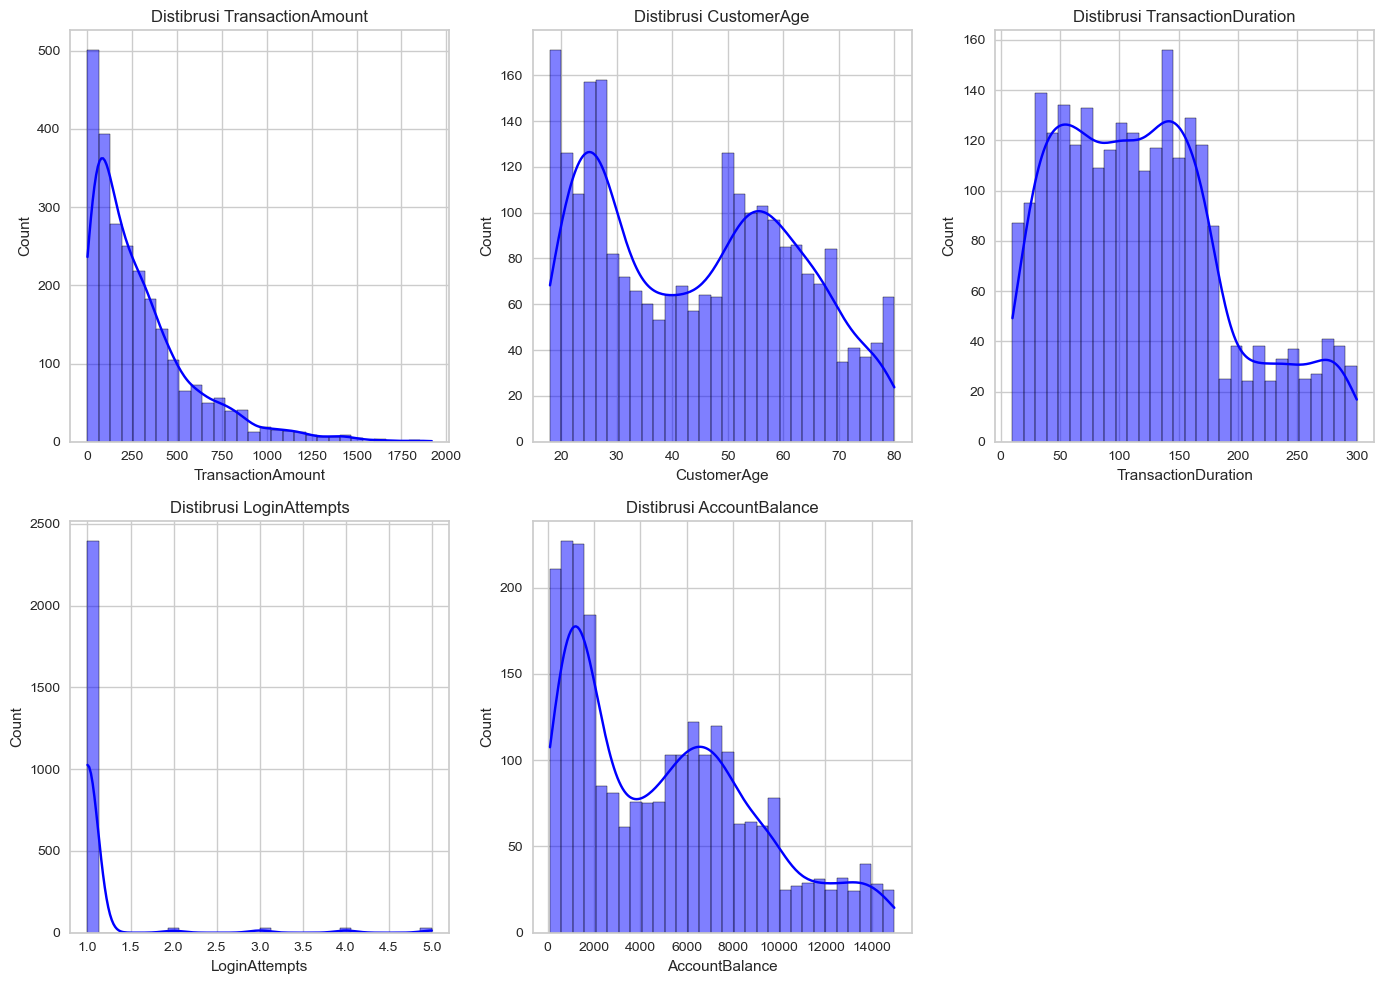

In [2686]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distibrusi {col}')

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

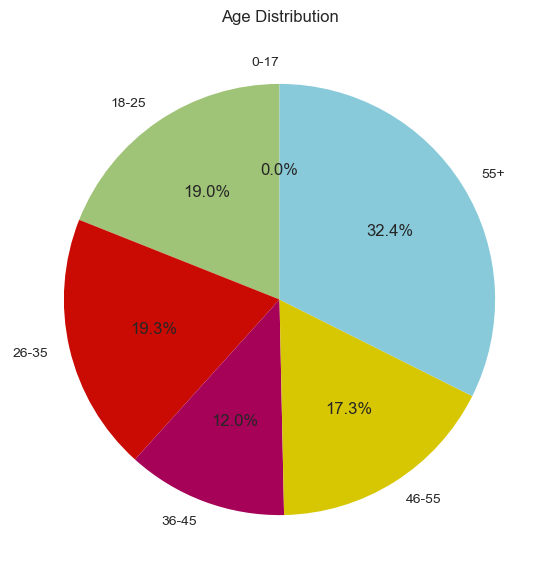

In [2687]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
age18below = df.CustomerAge[(df.CustomerAge < 18)]
age18_25 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 25)]
age26_35 = df.CustomerAge[(df.CustomerAge >= 26) & (df.CustomerAge <= 35)]
age36_45 = df.CustomerAge[(df.CustomerAge >= 36) & (df.CustomerAge <= 45)]
age46_55 = df.CustomerAge[(df.CustomerAge >= 46) & (df.CustomerAge <= 55)]
age55above = df.CustomerAge[(df.CustomerAge >= 56)]

age_range = ["0-17","18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18below.values),len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(7, 7))
plt.pie(y, labels=age_range, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [2688]:
# Mengecek dataset menggunakan isnull().sum()
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [2689]:
# Mengecek dataset menggunakan duplicated().sum()
duplicates = df.duplicated()
duplicates.sum()


np.int64(21)

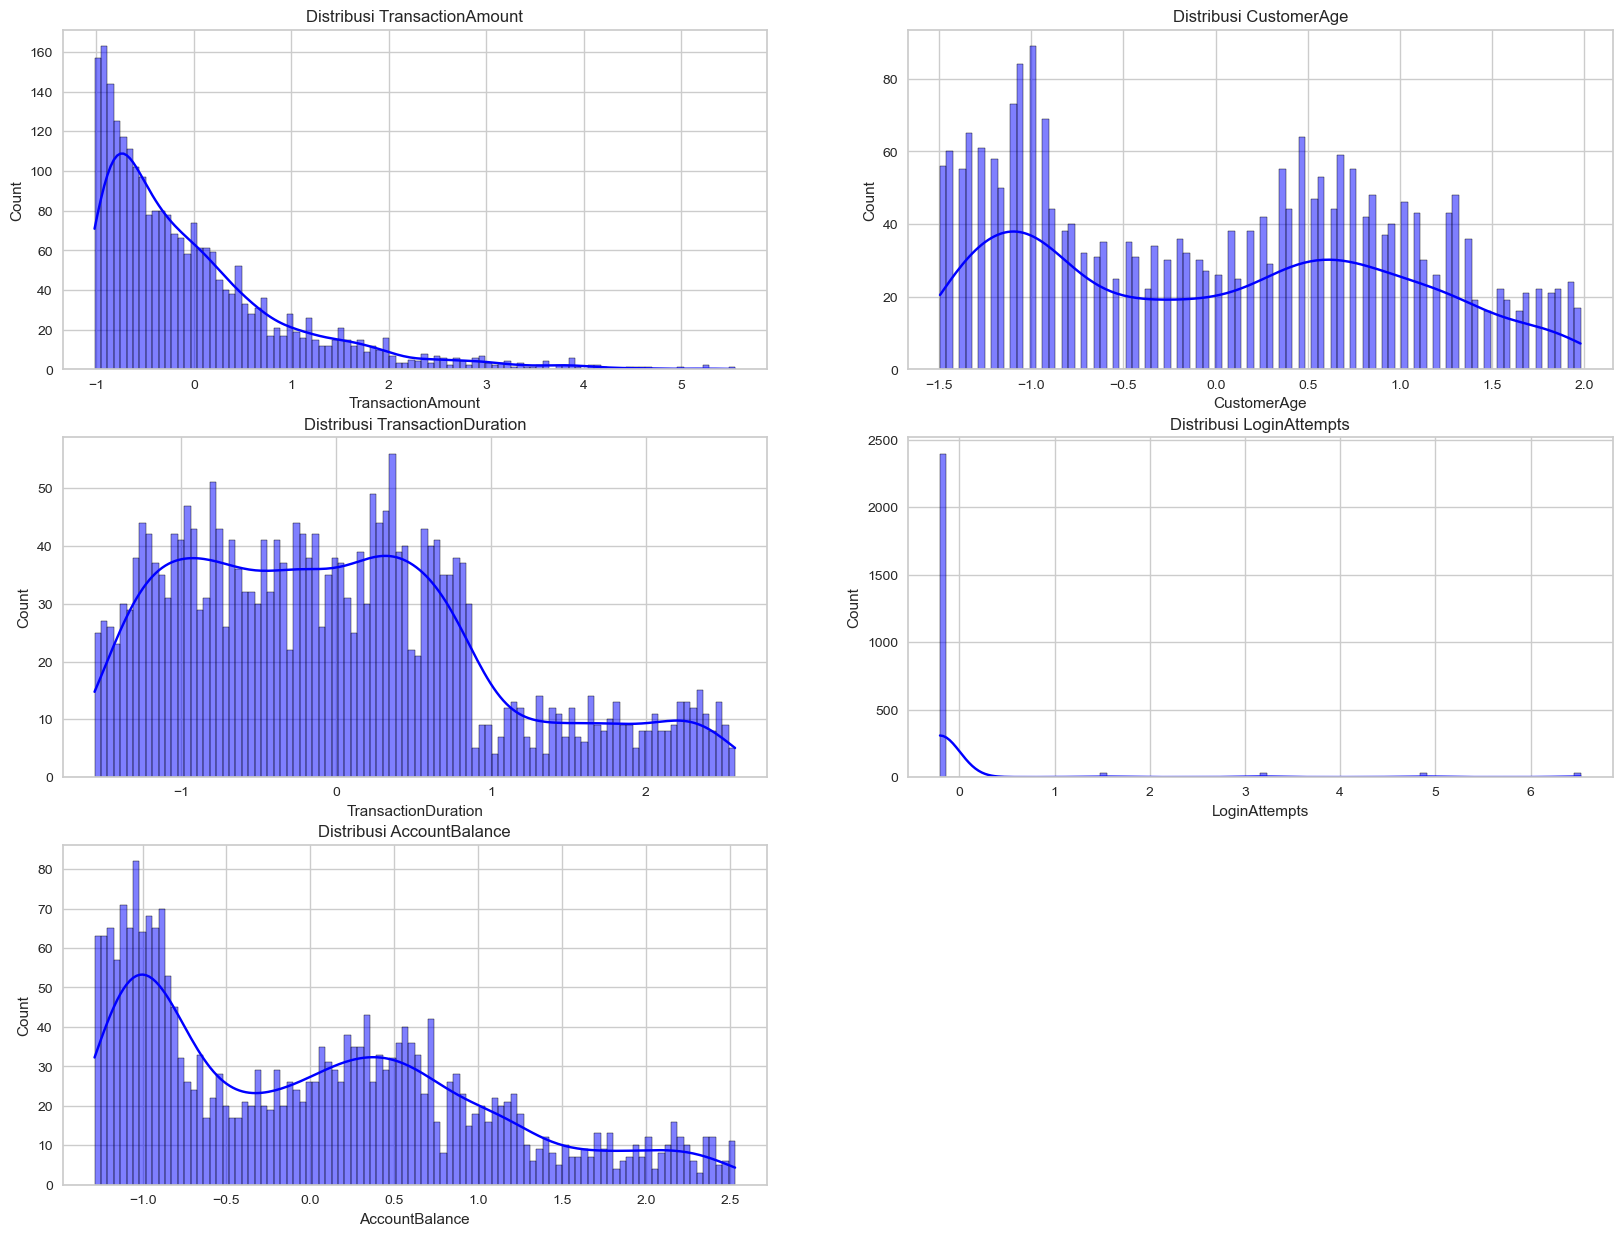

In [2690]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
std_scaler = StandardScaler()
df_encoded = df.copy()

num_cols = num_features.columns
scaled_values = std_scaler.fit_transform(df_encoded[num_cols])
df_encoded[num_cols] = pd.DataFrame(scaled_values, columns=num_cols, index=df_encoded.index)

n_cols = 2
n_rows = -(-len(num_cols) // n_cols)
  
plt.figure(figsize=(20, n_rows * 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_encoded[col], bins=100, kde=True, color='blue')
    plt.title(f'Distribusi {col}')


In [2691]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
print(df_encoded.columns)
df_encoded = df_encoded.drop(columns=['TransactionID', 'AccountID', 'IP Address', 'MerchantID', 'DeviceID'])

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


In [2692]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

label_encoder = LabelEncoder()

categorical_cols = df_encoded.select_dtypes(include=['object']).columns
encoders = {}

for column in categorical_cols:
    encoder = LabelEncoder()
    df_encoded[column] = encoder.fit_transform(df_encoded[column])
    encoders[column] = encoder


In [2693]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_encoded.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [2694]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_encoded[num_cols] = df_encoded[num_cols].fillna(df_encoded[num_cols].median())
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode()[0])
    df[col] = df[col].fillna(df[col].mode()[0])


In [2695]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_encoded = df_encoded.drop_duplicates()
df = df.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

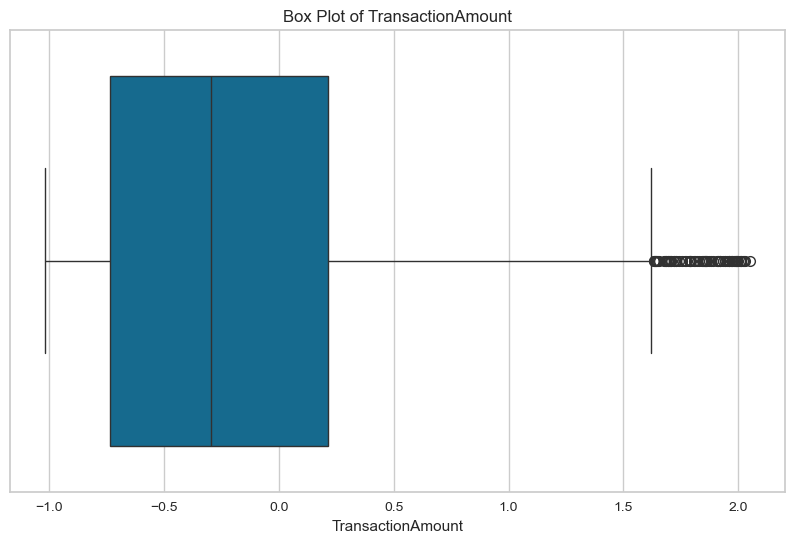

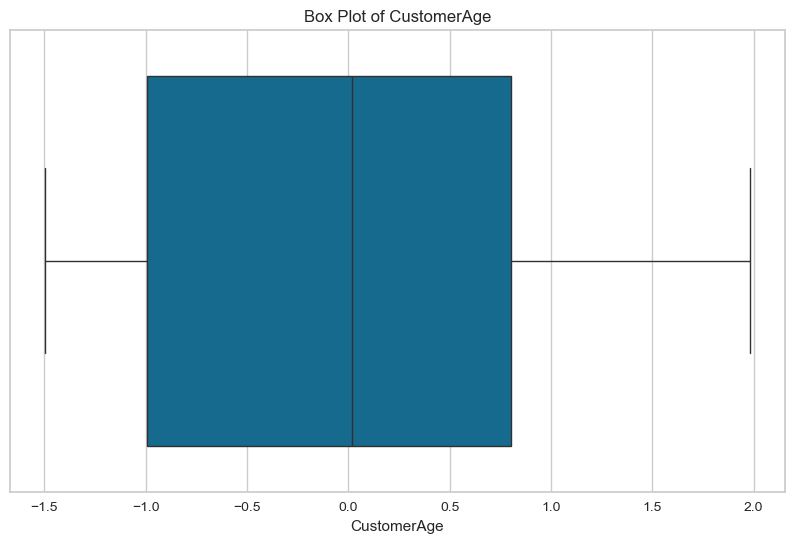

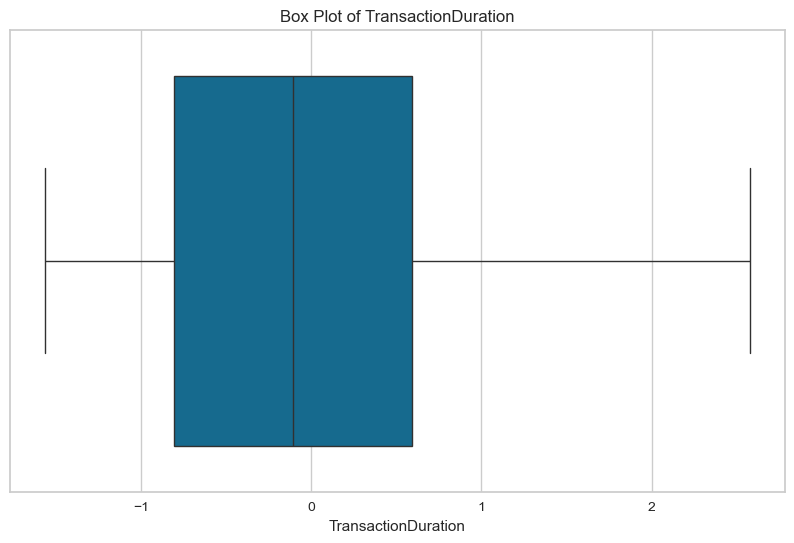

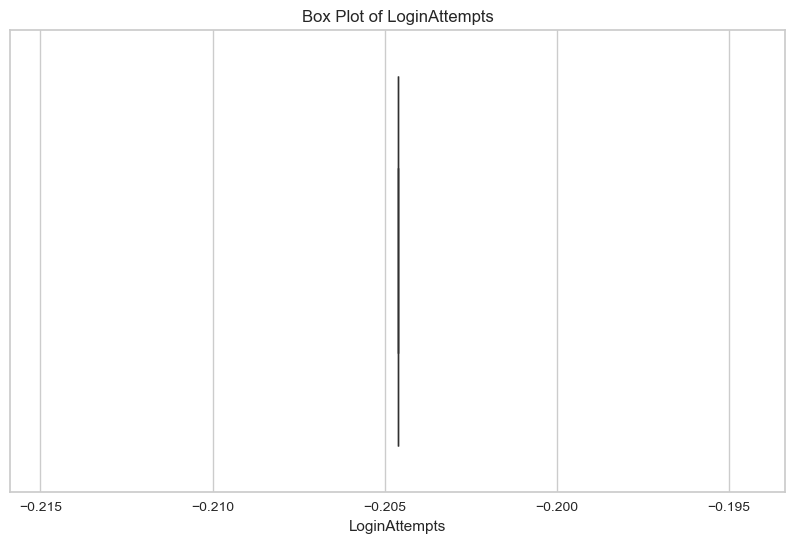

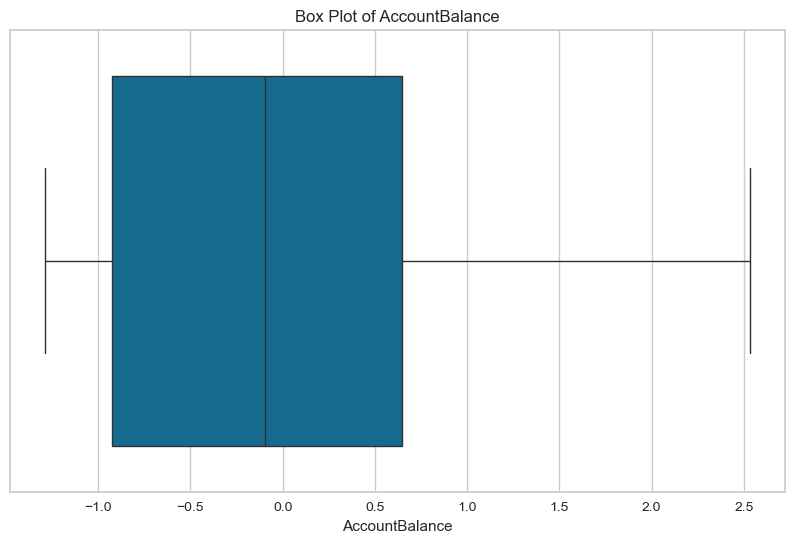

In [2696]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

for col in num_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_encoded[col].median()
    df_encoded[col] = df_encoded[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)


for feature in num_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_encoded[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


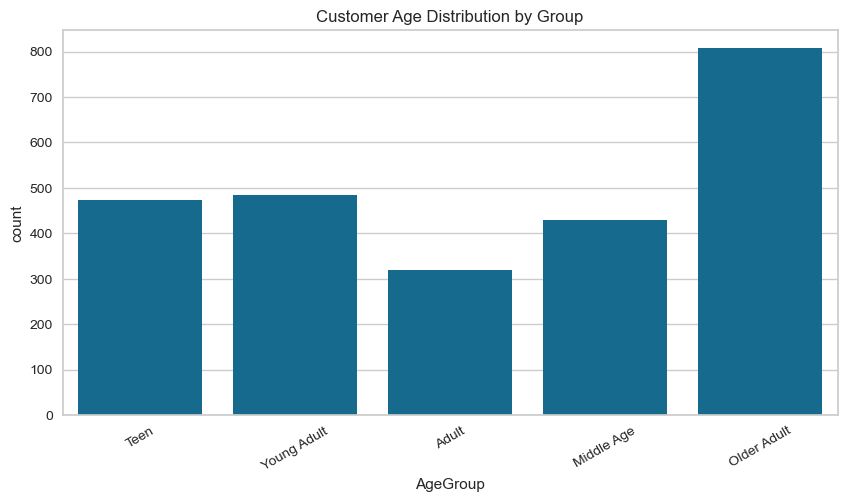

In [2697]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

bins = [18, 26, 36, 46, 56, 100]
age_labels = ['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Older Adult']

#create new column with binning values
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=age_labels, right=False)

#show binning to plot
plt.figure(figsize=(10, 5))
sns.countplot(x='AgeGroup', data=df, order=age_labels)
plt.title('Customer Age Distribution by Group')
plt.xticks(rotation=30)
plt.show()

# 1. Create encoder column in original df
df['AgeGroupOrdinal'] = label_encoder.fit_transform(df['AgeGroup'])

# # 2. Copy to encoded version
df_encoded[['AgeGroupOrdinal', 'AgeGroup']] = df[['AgeGroupOrdinal', 'AgeGroup']]


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [2698]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_encoded.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupOrdinal
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2.514000e+03,2514.000000,2514.000000,2514.000000
mean,-0.153976,1256.328958,0.787987,21.284010,1.01074,-0.003069,1.530231,0.000702,-2.046294e-01,-0.000193,180.889021,2.147971
std,0.722221,725.581982,0.437042,12.397534,0.83084,0.994836,1.150477,0.994014,1.052146e-14,0.995102,103.956287,1.271837
min,-1.017881,0.000000,0.000000,0.000000,0.00000,-1.495947,0.000000,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000
25%,-0.734076,628.250000,1.000000,11.000000,0.00000,-0.991288,0.250000,-0.805299,-2.046294e-01,-0.922221,91.250000,1.000000
50%,-0.295362,1256.500000,1.000000,21.000000,1.00000,0.018031,2.000000,-0.105944,-2.046294e-01,-0.097334,181.000000,2.000000
75%,0.212062,1884.750000,1.000000,32.000000,2.00000,0.803056,3.000000,0.593411,-2.046294e-01,0.648772,272.000000,3.000000
max,2.050618,2485.000000,2.000000,43.000000,3.00000,1.980594,4.000000,2.577295,-2.046294e-01,2.531190,360.000000,4.000000


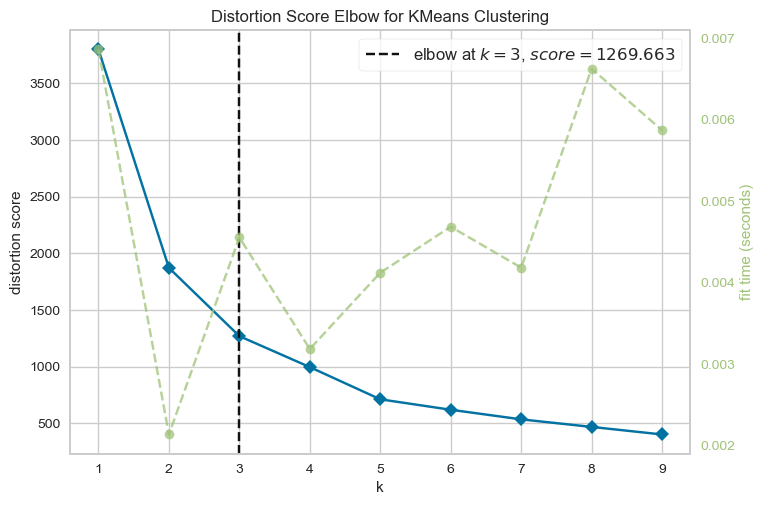

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2699]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
kmeans = KMeans()

X_scaled = df_encoded[['CustomerAge', 'TransactionAmount']].values

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_scaled)
visualizer.show()

In [2700]:
# Menggunakan algoritma K-Means Clustering
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

Jalankan cell code ini untuk menyimpan model kamu.

In [2701]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

k=2, Silhouette Score=0.4599
k=3, Silhouette Score=0.4687
k=4, Silhouette Score=0.4300
k=5, Silhouette Score=0.4157
k=6, Silhouette Score=0.3669
k=7, Silhouette Score=0.3713
k=8, Silhouette Score=0.3635
k=9, Silhouette Score=0.3716
k=10, Silhouette Score=0.3703


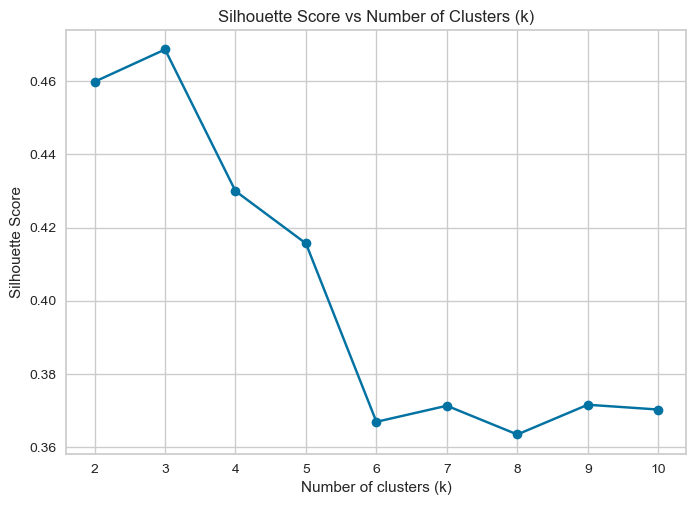

In [2702]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score

scores = []

# Try different k values
for k in range(2, 11):  # Start from 2, since k=1 gives invalid silhouette
    kmeans_score = KMeans(n_clusters=k, random_state=42)
    kmeans_score.fit(X_scaled)
    labels = kmeans_score.labels_
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")


plt.plot(range(2, 11), scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

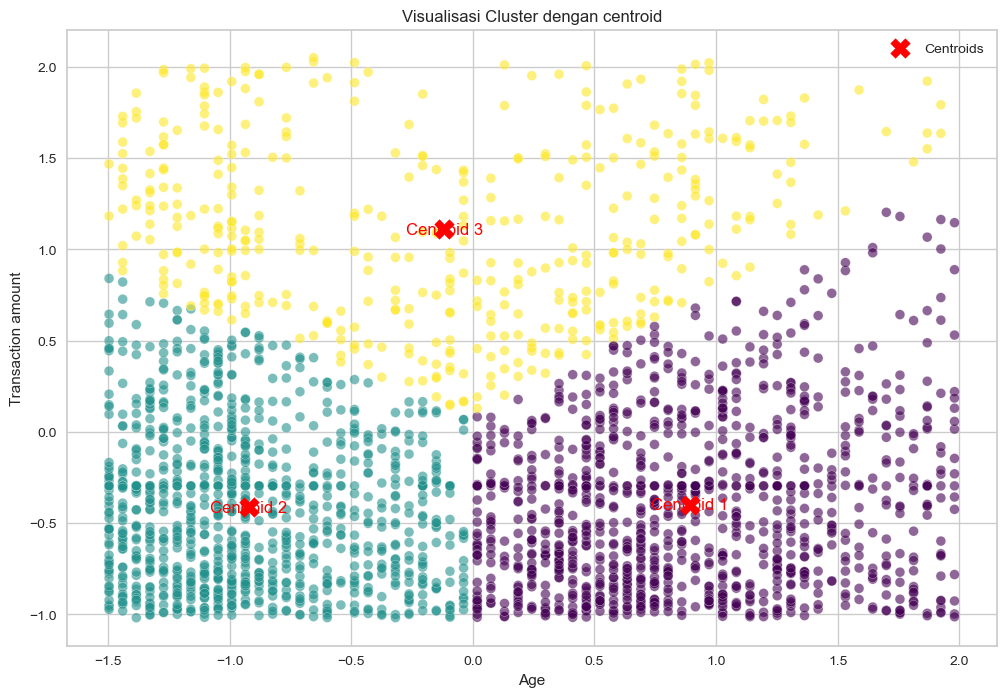

In [2703]:
# Membuat visualisasi hasil clustering

# Choose which features to visualize (by index)
kmeans_labels = kmeans.labels_

centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan centroid')
plt.xlabel('Age')
plt.ylabel('Transaction amount')
plt.legend()
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [2704]:
# Membangun model menggunakan PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_final = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=n_cluster)
kmeans_pca.fit(df_final)

KMeans(n_clusters=3)

In [2705]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [2706]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df_encoded = df_encoded.reset_index(drop=True)
df_encoded['Cluster'] = kmeans_labels

df_inverse = df_encoded.copy()

for cluster_id in range(n_cluster):
    cluster_data = X_scaled[kmeans_labels == cluster_id]
    mean_age = cluster_data[:, 0].mean()
    mean_spending = cluster_data[:, 1].mean()
    min_spending = cluster_data[:, 1].min()
    max_spending = cluster_data[:, 1].max()

    print(f"Cluster {cluster_id+1}")
    print(f"Rata-rata Umur: {mean_age:.2f})")
    print(f"Rata-rata Spending Amount(k$): {mean_spending:.2f}")
    print(f"Minimal Spending Amount(k$): {min_spending:.2f}")
    print(f"Maksimal Spending Amount(k$): {max_spending:.2f}\n")


Cluster 1
Rata-rata Umur: 0.89)
Rata-rata Spending Amount(k$): -0.40
Minimal Spending Amount(k$): -1.02
Maksimal Spending Amount(k$): 1.20

Cluster 2
Rata-rata Umur: -0.92)
Rata-rata Spending Amount(k$): -0.41
Minimal Spending Amount(k$): -1.02
Maksimal Spending Amount(k$): 0.84

Cluster 3
Rata-rata Umur: -0.12)
Rata-rata Spending Amount(k$): 1.11
Minimal Spending Amount(k$): 0.13
Maksimal Spending Amount(k$): 2.05



## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
  **Cluster 1: (Nasabah dengan rata-rata usia Older Adult(56–100) memiliki 💵 Medium Spending level)**:

* **Rata-rata (mean) Umur:** 0.89 *(skala terstandarisasi — sebelum inverse)*
* **Rata-rata (mean) Spending Amount:** -0.40 *(skala terstandarisasi)*
* **Rentang Spending Amount:** dari -1.02 hingga 1.20
* **Analisis:**
  Cluster ini berisi pelanggan dengan **usia relatif lebih tinggi dari rata-rata (positif)**, namun dengan **tingkat pengeluaran yang lebih rendah dari rata-rata (negatif)**.
  Pelanggan ini kemungkinan **lebih matang secara usia tetapi berhati-hati dalam berbelanja**.
  Rekomendasi: tawarkan produk perbankan yang berfokus pada **investasi stabil dan tabungan jangka panjang**.

  **Cluster 2: (Nasabah dengan rata-rata usia Young Adult(26–35) memiliki 💵 Medium Spending level)**

* **Rata-rata (mean) Umur:** -0.92 *(sebelum inverse)*
* **Rata-rata (mean) Spending Amount:** -0.41 *(sebelum inverse)*
* **Rentang Spending Amount:** dari -1.02 hingga 0.84
* **Analisis:**
  Cluster ini mencakup pelanggan dengan **usia di bawah rata-rata** dan **tingkat pengeluaran yang lebih rendah dari rata-rata (negatif)**.
  Kemungkinan ini adalah **pelanggan muda atau baru** yang belum memiliki daya beli tinggi.
  Rekomendasi: tawarkan **program promosi, cashback, atau produk entry-level** untuk meningkatkan engagement mereka.

  **Cluster 3: (Nasabah dengan rata-rata usia Adult(36–45) memiliki 💰 Large Spending level)**

* **Rata-rata (mean) Umur:** -0.12 *(sebelum inverse)*
* **Rata-rata (mean) Spending Amount:** 1.11 *(sebelum inverse)*
* **Rentang Spending Amount:** dari 0.13 hingga 2.05
* **Analisis:**
  Cluster ini mencakup pelanggan dengan **usia mendekati rata-rata** namun memiliki **pengeluaran tinggi (di atas rata-rata)**.
  Mereka kemungkinan adalah **pelanggan aktif secara ekonomi** dengan preferensi terhadap **produk premium atau layanan bernilai tambah**.
  Rekomendasi: arahkan **strategi pemasaran untuk produk high-end atau investasi jangka menengah.**

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [2707]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_encoded.rename(columns={'Cluster': 'Target'}, inplace=True)
df_inverse.rename(columns={'Cluster': 'Target'}, inplace=True)


In [2708]:
# Simpan Data
df_encoded.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [2709]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse[num_cols] = std_scaler.inverse_transform(df_inverse[num_cols])
# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupOrdinal,AgeGroup,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,2,Older Adult,0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2,Older Adult,0
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,3,Teen,1
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,4,Young Adult,1
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,0,Adult,0


In [2710]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)

for column in categorical_cols:
    encoder = encoders[column]
    df_inverse[column] = encoder.inverse_transform(df_encoded[column].astype(int))
# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupOrdinal,AgeGroup,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2,Older Adult,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2,Older Adult,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,3,Teen,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,4,Young Adult,1
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,0,Adult,0


In [2711]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
age_range_map = {
    'Teen': '18–25',
    'Young Adult': '26–35',
    'Adult': '36–45',
    'Middle Age': '46–55',
    'Older Adult': '56–100'
}

max_spending = df_inverse['TransactionAmount'].max()

percentiles = np.linspace(0, 1, n_cluster + 1)  # e.g. for k=3 → [0. , 0.33, 0.66, 1.0]
thresholds = df_inverse['TransactionAmount'].quantile(percentiles).values

# Define labels dynamically
spending_levels = []
if n_cluster == 3:
    spending_levels = ['💸 Small', '💵 Medium', '💰 Large']
elif n_cluster == 4:
    spending_levels = ['💸 Small', '💵 Medium', '💰 High', '💎 Huge']
else:
    # Automatically generate generic labels if k > 4
    base_labels = ['Very Small', 'Small', 'Medium', 'High', 'Huge', 'Ultra', 'Elite']
    spending_levels = base_labels[:k]

for cluster_id in range(n_cluster):
    cluster_data = df_inverse[df_inverse['Target'] == cluster_id]
    mean_age = cluster_data['CustomerAge'].mean()
    mean_spending = cluster_data['TransactionAmount'].mean()
    min_spending = cluster_data['TransactionAmount'].min()
    max_spending = cluster_data['TransactionAmount'].max()
    age_group = pd.cut([mean_age], bins=bins, labels=age_labels, right=False)[0]
    age_range = age_range_map.get(age_group, "Unknown")     
    spending_level = pd.cut([mean_spending], bins=thresholds, labels=spending_levels, include_lowest=True)[0]

    print(f"Cluster {cluster_id+1}: (Nasabah dengan rata-rata usia {age_group}({age_range}) memiliki {spending_level} Spending level ")
    print(f"Rata-rata Umur: {mean_age:.2f} ({age_group})")
    print(f"Rata-rata Spending Amount(k$): {mean_spending:.2f}")
    print(f"Minimal Spending Amount(k$): {min_spending:.2f}")
    print(f"Maksimal Spending Amount(k$): {max_spending:.2f} \n")

Cluster 1: (Nasabah dengan rata-rata usia Older Adult(56–100) memiliki 💵 Medium Spending level 
Rata-rata Umur: 60.59 (Older Adult)
Rata-rata Spending Amount(k$): 180.53
Minimal Spending Amount(k$): 0.84
Maksimal Spending Amount(k$): 649.28 

Cluster 2: (Nasabah dengan rata-rata usia Young Adult(26–35) memiliki 💵 Medium Spending level 
Rata-rata Umur: 28.27 (Young Adult)
Rata-rata Spending Amount(k$): 176.59
Minimal Spending Amount(k$): 0.26
Maksimal Spending Amount(k$): 543.47 

Cluster 3: (Nasabah dengan rata-rata usia Adult(36–45) memiliki 💰 Large Spending level 
Rata-rata Umur: 42.52 (Adult)
Rata-rata Spending Amount(k$): 621.79
Minimal Spending Amount(k$): 335.48
Maksimal Spending Amount(k$): 896.79 



## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
**Cluster 1: (Nasabah dengan rata-rata usia Older Adult(56–100) memiliki 💵 Medium Spending level)**

- **Rata-rata Umur:** 60.59 (Older Adult) 
- **Rata-rata Spending Amount(k$):** 180.53
- **Minimal Spending Amount(k$):** 0.84
- **Maksimal Spending Amount(k$):** 649.28
- **Analisis:** Cluster ini mencakup pelanggan dengan usia Lanjut dan tingkat pengeluaran yang menengah. Pelanggan dalam cluster ini cenderung memiliki daya beli yang menengah dan mereka lebih cenderung untuk membelanjakan sebagian pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan mendorong engagement melalui reward atau cashback.

**Cluster 2: (Nasabah dengan rata-rata usia Young Adult(26–35) memiliki 💵 Medium Spending level)**

- **Rata-rata Umur:** 28.27 (Young Adult)
- **Rata-rata Spending Amount(k$):** 176.59
- **Minimal Spending Amount(k$):** 0.26
- **Maksimal Spending Amount(k$):** 543.47
- **Analisis:** Cluster ini mencakup pelanggan dengan usia Usia Remaja dan tingkat pengeluaran yang menengah. Pelanggan dalam cluster ini cenderung memiliki daya beli yang menengah dan mereka lebih cenderung untuk membelajakan sebagian pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan mendorong engagement melalui reward atau cashback.

**Cluster 3: (Nasabah dengan rata-rata usia Adult(36–45) memiliki 💰 Large Spending level)**

- **Rata-rata Umur:** 42.52 (Adult)
- **Rata-rata Spending Amount(k$):** 621.79
- **Minimal Spending Amount(k$):** 335.48
- **Maksimal Spending Amount(k$):** 896.79
- **Analisis:** Cluster ini mencakup pelanggan dengan usia Dewasa dan tingkat pengeluaran yang tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [2712]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse['Target'] = kmeans_labels

In [2713]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.